### Пет-проект на тему 
### '*Демонстрация применения Random Forests*'

#### 1) На примере датасета 'Титаник'

```
Импорт модуля RandomForestClassifier и средства поиска оптимальных гиперпараметров GridSearchCV библиотеки sklearn + pandas, numpy
```

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

```
Импорт метода train_test_split для разделения датасета на 4 группы: X_train, X_test, y_train, y_test
```

In [2]:
from sklearn.model_selection import train_test_split

```
Загрузка входных данных и определение X, y из них
```

In [3]:
titanic_data = pd.read_csv('C:/Users/Pc/ml_step_kc/train.csv')
titanic_data.head()

X = titanic_data.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name'], axis=1)
X.head()

X = pd.get_dummies(X)
X.head()

X = X.fillna({'Age':X.Age.median()})
X.head()

y = titanic_data.Survived

```
Разделение датасета на 4 группы
```

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


```
Определение модели RandomForest со стандартными гиперпараметрами
```

In [5]:
clf_rf = RandomForestClassifier()

```
Определим гиперпараметры, среди которых будем искать оптимальную их комбинацию
```

In [6]:
parametrs = {'n_estimators':[10,20,30], 'max_depth':[2,5,7,10]}

```
Настраиваем средство поиска оптимальных гиперпараметров со значением кросс-вариации входных данных равным 5
```

In [7]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

```
Поиск оптимальных гиперпараметров на датасете X_train с ожидаемым результатом y_train
```

In [8]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [9]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

```
Создание random forest с найденными оптимальными гиперпараметрами
```

In [10]:
best_clf = grid_search_cv_clf.best_estimator_

In [11]:
best_clf.score(X_train, y_train)

0.9010067114093959

In [12]:
best_clf.score(X_test, y_test)

0.8067796610169492

```
Вывод 'важности' фичей (влияние на резульатат)
```

In [13]:
feature_importances = best_clf.feature_importances_

```
Визуализация важности фичей отсортированным датафреймом
```

In [14]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances':feature_importances})

In [15]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,Sex_female,0.223479
4,Fare,0.174705
6,Sex_male,0.172486
1,Age,0.153176
0,Pclass,0.130163
2,SibSp,0.049115
3,Parch,0.044716
7,Embarked_C,0.023076
9,Embarked_S,0.019378
8,Embarked_Q,0.009704


#### 2) На примере датасета 'Болезни сердца'

In [16]:
np.random.seed(0)

```
Стандартные операции над входным датасетом
```

In [17]:
hi = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv') 
hi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X_tra = hi.drop('target', axis = 1)

In [19]:
y_tra = hi.target

```
Определение модели RandomForest со определенными гиперпараметрами
```

In [20]:
rf = RandomForestClassifier(10, max_depth=5)

```
Обучение random forest
```

In [21]:
rf.fit(X_tra, y_tra)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [22]:
rf.score(X_tra, y_tra)

0.9174917491749175

```
Визуализация важности фичей отсортированным датафреймом и столбчатой диаграммой 
```

In [23]:
feature_importance = pd.DataFrame({'label':list(X_tra), 'feature_imp':rf.feature_importances_})

In [24]:
feature_importance.sort_values('feature_imp', ascending=False)

,label,feature_imp
12,thal,0.198525
2,cp,0.139983
7,thalach,0.129550
9,oldpeak,0.116645
11,ca,0.077048
10,slope,0.069208
4,chol,0.056887
3,trestbps,0.053569
8,exang,0.048079
0,age,0.043441


<AxesSubplot:>

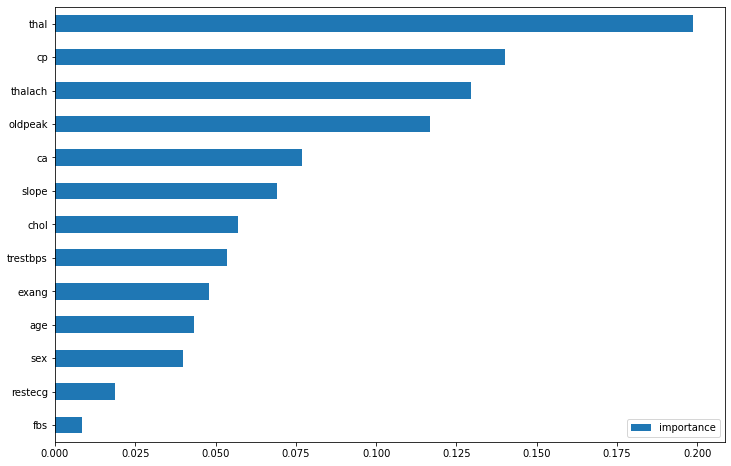

In [25]:
imp = pd.DataFrame(rf.feature_importances_, index=X_tra.columns, columns=['importance']) 
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))